# **1. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

# **2. Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum04"

In [4]:
df = pd.read_csv(path + '/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


# **3. Eksplorasi Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


# **4. Data Pre-processing**

**4.1 Cek Missing Value**

In [8]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


**4.2 Cek Nili Unik**

In [47]:
df['Beli_Mobil'].unique()

array([1, 0])

In [20]:
df['Kelamin'].unique()

array([0, 1])

**4.3 Mapping Kolom Kategorik ke Bentuk Numerik**

In [37]:
# 1. Mapping kolom Beli_Mobil ke biner
# Misalnya:
# 1 = Beli Mobil → 1
# 0 = Tidak Beli Mobil → 0
map_beli_mobil = {1: 1, 0: 0}
df['Beli_Mobil_bin'] = df['Beli_Mobil'].map(map_beli_mobil).astype('Int64')

# 2. Mapping kolom Kelamin ke biner (jika 1 = laki-laki, 0 = perempuan)
df['Kelamin_bin'] = df['Kelamin'].astype(int)


print("Distribusi Beli_Mobil_bin:\n", df['Beli_Mobil_bin'].value_counts())
print("\nDistribusi Kelamin_bin:\n", df['Kelamin_bin'].value_counts())

Distribusi Beli_Mobil_bin:
 Beli_Mobil_bin
1    633
0    367
Name: count, dtype: Int64

Distribusi Kelamin_bin:
 Kelamin_bin
0    519
1    481
Name: count, dtype: int64


**4.4 Analisis Korelasi Antar Variabel Numerik**

In [48]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Status_bin,Kelamin_bin,Beli_Mobil_bin
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614,-0.037266,0.014646,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127,-0.060514,0.019454,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584,-0.860839,-0.008561,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,-0.024491,1.000000,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005,-0.084535,0.035199,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930,-0.058317,-0.054211,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,-0.005117,-0.147301,1.000000
Status_bin,-0.037266,-0.060514,-0.860839,-0.024491,-0.084535,-0.058317,-0.005117,1.000000,-0.024491,-0.005117
Kelamin_bin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,-0.024491,1.000000,-0.147301
Beli_Mobil_bin,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,-0.005117,-0.147301,1.000000


**4.5 Visualisasi Heatmap Korelasi**

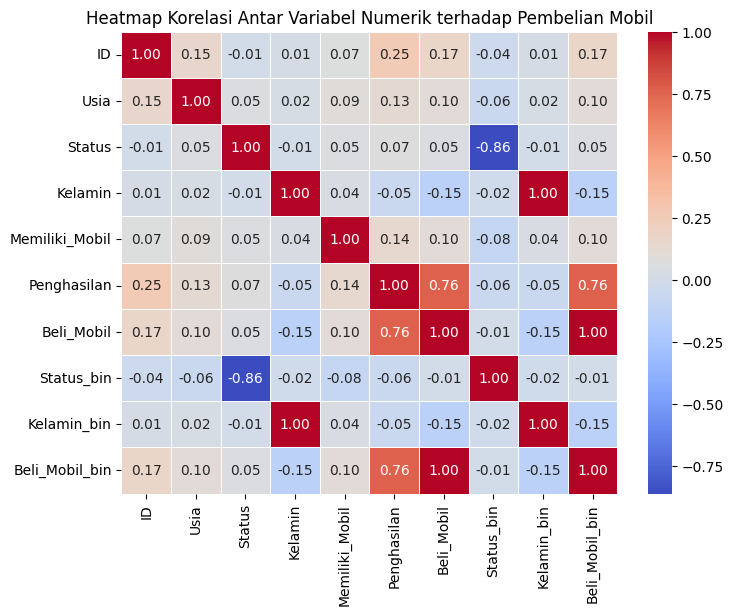

In [49]:
# Visualisasi Heatmap
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Pembelian Mobil')
plt.show()

# **5. Pembagian Dataset (Training dan Testing)**

**5.1 Menentukan Fitur dan Target**

In [50]:
# Fitur numerik dan gender
feature_num = ['ID', 'Usia', 'Memiliki_Mobil', 'Penghasilan', 'Status']
feature_bin = ['Kelamin_bin']


#Gabungan  & drop  missing
use_cols = feature_num + feature_bin + ['Beli_Mobil_bin']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil_bin']

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (1000, 6)
y Shape:  (1000,)


**5.2 Membagi Dataset menjadi Training dan Testing Set**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42,
    stratify=y
    )

print("Data Latih: ", X_train.shape)
print("Data Uji: ", X_test.shape)

Data Latih:  (800, 6)
Data Uji:  (200, 6)


# **6. Pembangunan Model Logistic Regression**

In [52]:
#Scale hanya fitur numerik, gender langsung passthrough
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],

    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

#Latihan Model
clf.fit(X_train, y_train)
print("✅ Model Logistik Regression berhasil dilatih.")

✅ Model Logistik Regression berhasil dilatih.


# **7. Prediksi Model dan Evaluasi Model**

In [53]:
# Prediksi & Probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluasi Model
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Akurasi: 0.9300
Precision: 0.9829
Recall: 0.9055
F1 Score: 0.9426
ROC AUC Score: 0.9769


# **8. Visualisasi Hasil Evaluasi**

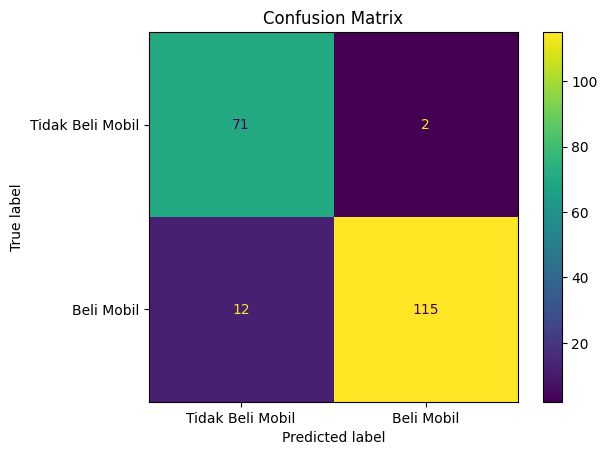

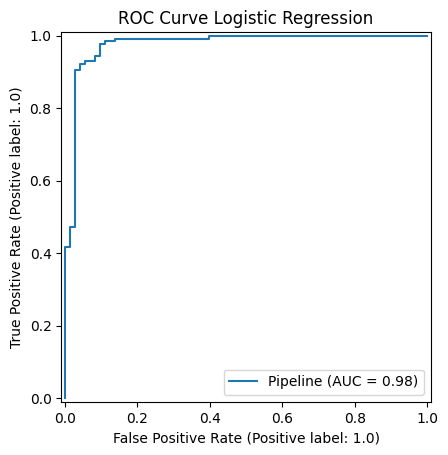

In [54]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli Mobil', 'Beli Mobil']
                       ).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

# **9. Classification Report**

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli Mobil (0)', 'Beli Mobil (1)']))

                      precision    recall  f1-score   support

Tidak Beli Mobil (0)       0.86      0.97      0.91        73
      Beli Mobil (1)       0.98      0.91      0.94       127

            accuracy                           0.93       200
           macro avg       0.92      0.94      0.93       200
        weighted avg       0.94      0.93      0.93       200



# **10. Interpretasi Model Logistic Regression**

In [56]:
#Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values(by='Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
3,Penghasilan,4.554667,95.075064
2,Memiliki_Mobil,0.079144,1.082360
0,ID,-0.002579,0.997424
1,Usia,-0.047267,0.953833
4,Status,-0.134059,0.874539
5,Kelamin_bin,-1.132423,0.322251


# **11. Prediksi Data Baru**

In [60]:
# Contoh 2 anak
data_baru = pd.DataFrame({
    'ID': [1001, 1002], # Add ID column
    'Usia': [24, 10], # Add Usia column
    'Memiliki_Mobil': [0, 1], # Corrected values for Memiliki_Mobil
    'Status': [1, 2], # Add Status column
    'Penghasilan' : [200, 150], # Corrected column name and example values
    'Kelamin_bin' : [1, 0] # Corrected column name
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred
display(hasil)

,ID,Usia,Memiliki_Mobil,Status,Penghasilan,Kelamin_bin,Prob_Beli_Mobil,"Pred (0=Tidak, 1=Ya)"
0,1001,24,0,1,200,1,0.113784,0.0
1,1002,10,1,2,150,0,0.035560,0.0
